In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3            
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=96)

/Users/kropskja/opt/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.6 anndata==0.7.1 umap==0.4.1 numpy==1.18.4 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1.post1


In [2]:
epithelial = sc.read_h5ad('./epithelial_recluster.h5ad')

In [3]:
interferon_genes = ['Ifnar1', 'Ifnar2', 'Ifngr1', 'Ifngr2', 'Ifitm1', 'Ifitm3', 'Jak1', 'Mx1', 'H2-K1', 'H2-Aa', 'H2-Ab1', 'Cd74', 'H2-DMb1']

In [4]:
sc.tl.score_genes(epithelial, interferon_genes, score_name='Ifn_score')

computing score 'Ifn_score'
    finished: added
    'Ifn_score', score of gene set (adata.obs) (0:00:00)


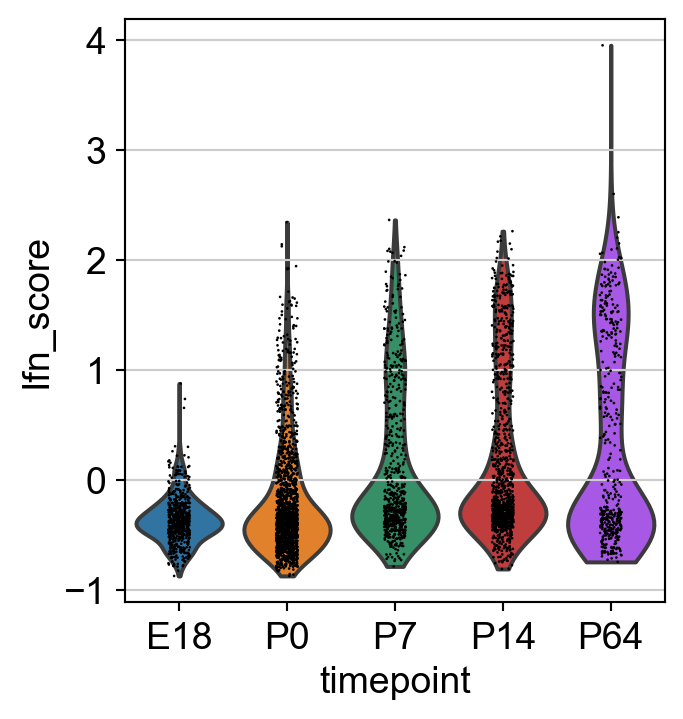

In [5]:
ax = sc.pl.violin(epithelial, ['Ifn_score'], groupby='timepoint', save='ifn_score_timepoint.pdf')

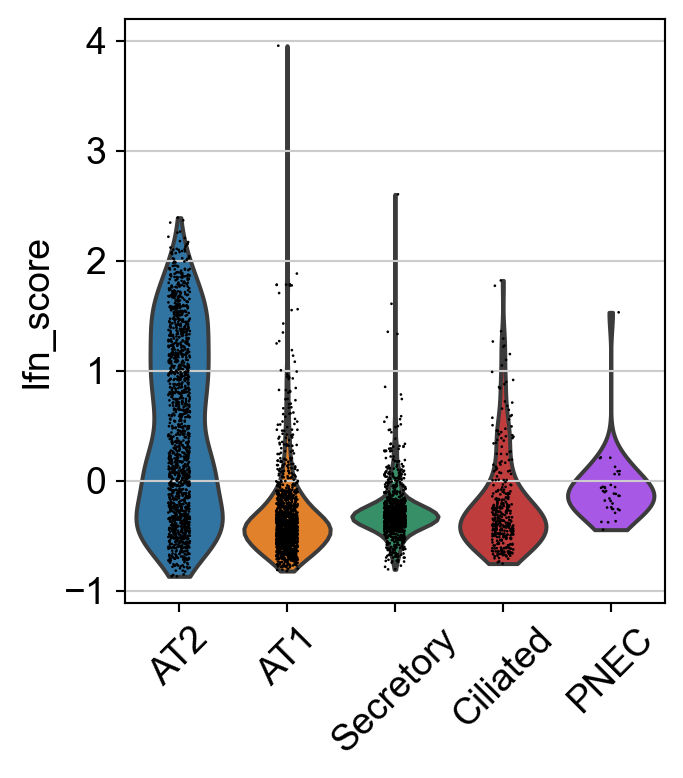

In [6]:
ax = sc.pl.violin(epithelial, ['Ifn_score'], groupby='leiden', rotation = 45, save='ifn_score_celltype.pdf')

In [7]:
at1 = epithelial[epithelial.obs['leiden'].isin(['AT1'])]
at2 = epithelial[epithelial.obs['leiden'].isin(['AT2'])]
secretory = epithelial[epithelial.obs['leiden'].isin(['Secretory'])]
ciliated = epithelial[epithelial.obs['leiden'].isin(['Ciliated'])]

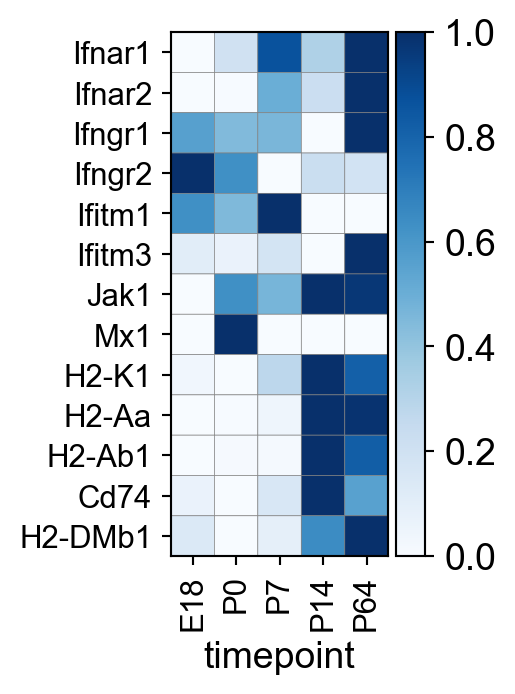

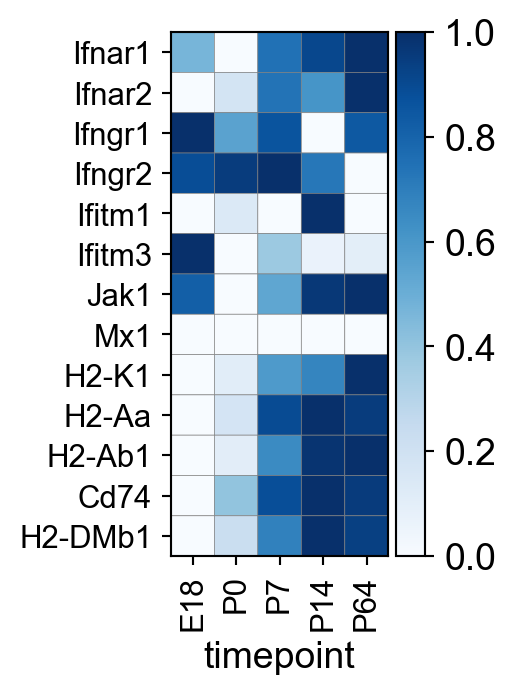

In [8]:
ax = sc.pl.matrixplot(at1, interferon_genes , groupby='timepoint', swap_axes=True, cmap='Blues', standard_scale='var', save='at1_ifn_genes.pdf')
ax = sc.pl.matrixplot(at2, interferon_genes , groupby='timepoint', swap_axes=True,cmap='Blues',standard_scale='var', save='at2_ifn_genes.pdf')

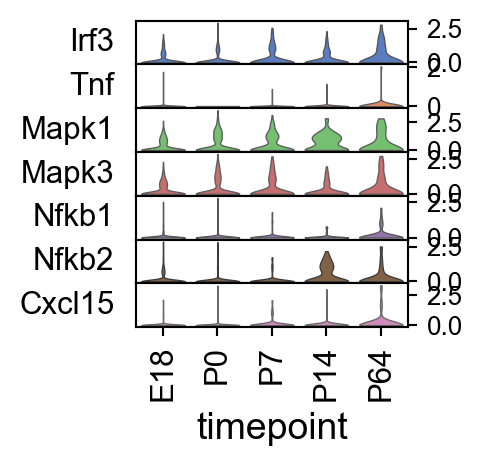

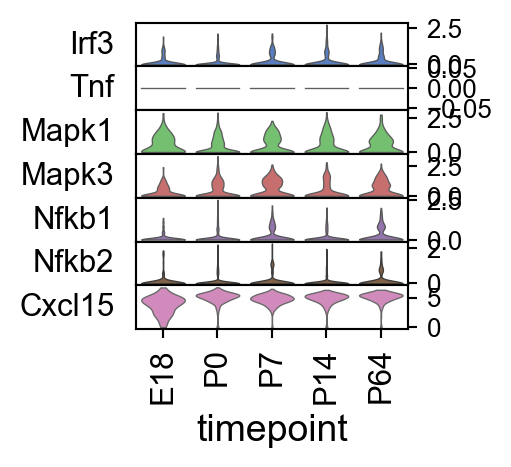

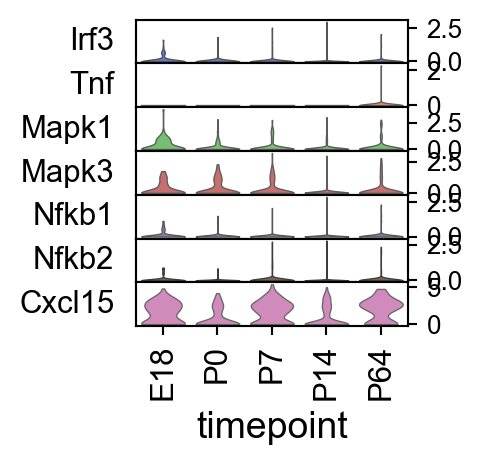

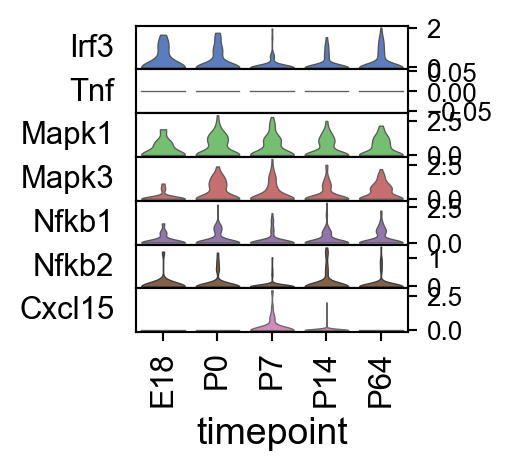

In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6
immune_genes = ['Irf3', 'Tnf', 'Mapk1', 'Mapk3','Nfkb1', 'Nfkb2', 'Cxcl15']
ax = sc.pl.stacked_violin(at1, immune_genes, groupby='timepoint', swap_axes=True, title='AT1', save='at1_inate_genes.pdf')
ax = sc.pl.stacked_violin(at2, immune_genes, groupby='timepoint', swap_axes=True, title='AT2', save='at2_inate_genes.pdf')
ax = sc.pl.stacked_violin(secretory, immune_genes, groupby='timepoint', swap_axes=True, title='Secretory', save='secretory_inate_genes.pdf')
ax = sc.pl.stacked_violin(ciliated, immune_genes, groupby='timepoint', swap_axes=True, title='Ciliated', save='ciliated_inate_genes.pdf')